In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Exploration

File opened successfully.


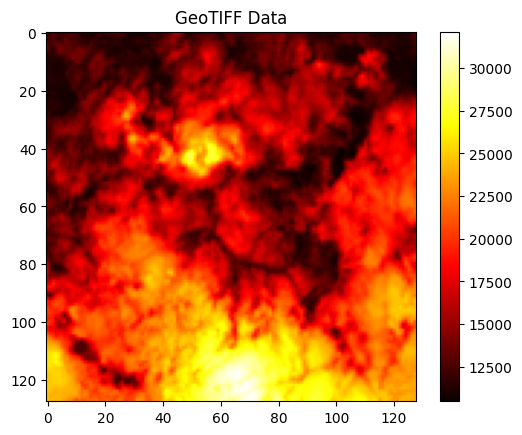

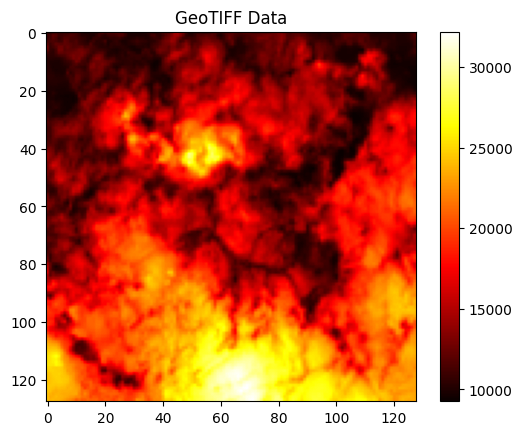

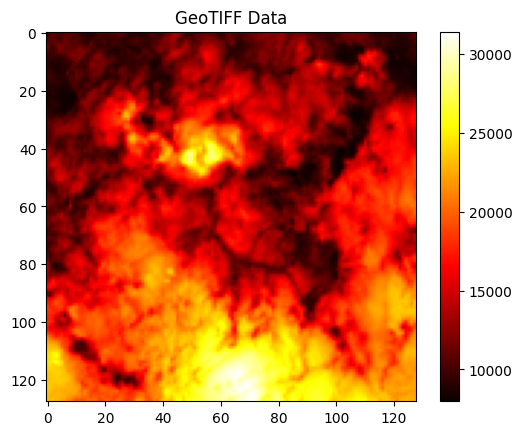

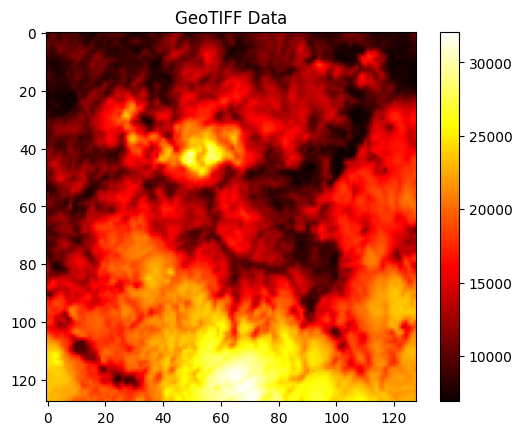

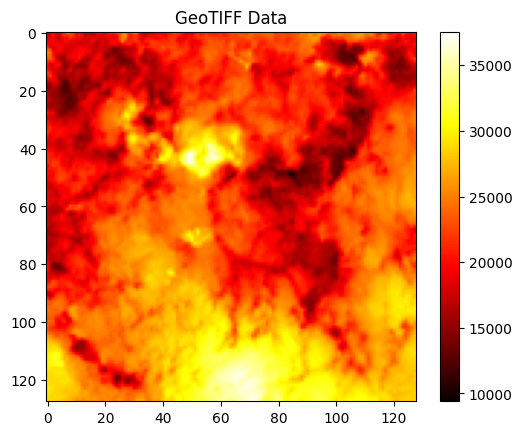

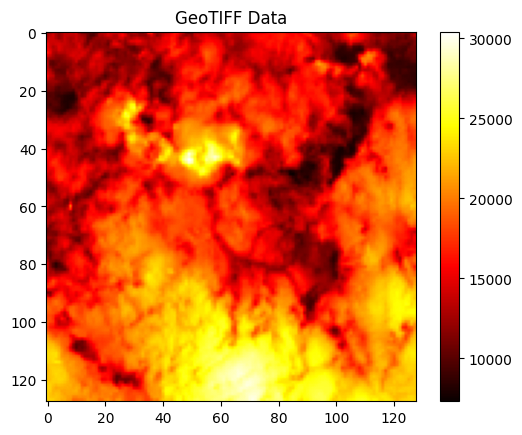

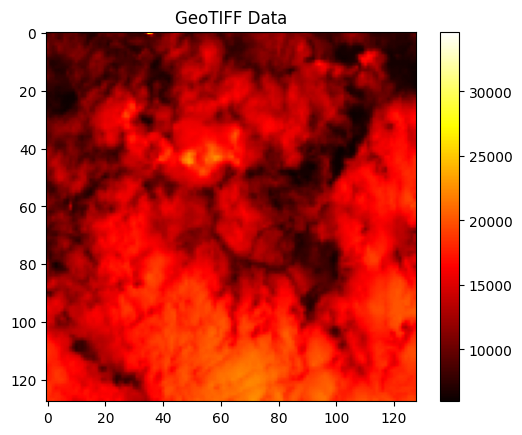

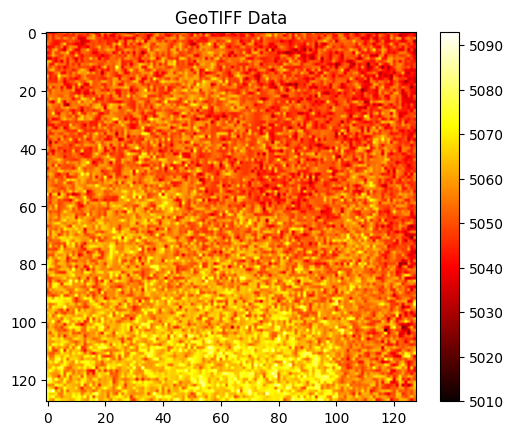

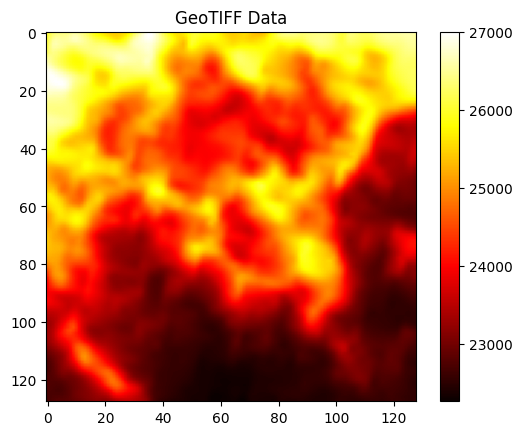

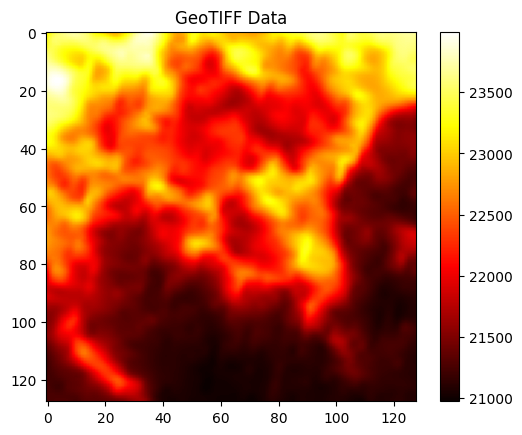

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/z227056_allbands_fire/LC08_L1GT_227056_20180315_20180315_01_RT_bands_f_s128_p06595.tif'
dataset = gdal.Open(file_path)
# Get information about the dataset
if dataset is None:
    print("Error opening the file.")
else:
    print("File opened successfully.")

# Get information about the dataset
band_count = dataset.RasterCount
width = dataset.RasterXSize
height = dataset.RasterYSize
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()

for band_idx in range(1, band_count + 1):
    band = dataset.GetRasterBand(band_idx)
    band_data = band.ReadAsArray()
    plt.imshow(band_data, cmap='hot')
    plt.colorbar()
    plt.title('GeoTIFF Data')
    plt.show()



In [ ]:
description = dataset.GetMetadataItem('TIFFTAG_IMAGEDESCRIPTION')

if description:
    print("Image Description:")
    print(description)
else:
    print("No image description found.")

# Close the dataset
dataset = None



No image description found.


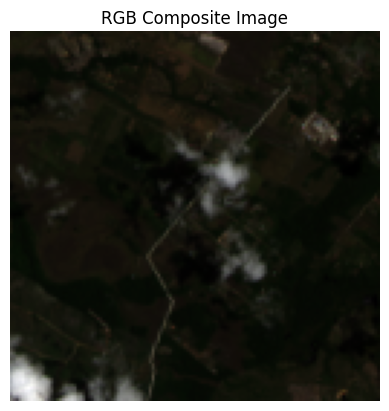

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Open the GeoTIFF file
file_path = "/content/drive/MyDrive/z227056_allbands_fire/LC08_L1TP_227056_20180907_20180907_01_RT_bands_f_s128_p06594.tif"

dataset = gdal.Open(file_path)



# Get the red, green, and blue bands (assuming bands 4, 3, and 2)
red_band = dataset.GetRasterBand(4).ReadAsArray()
green_band = dataset.GetRasterBand(3).ReadAsArray()
blue_band=dataset.GetRasterBand(2).ReadAsArray()


# Normalize the bands to the [0, 1] range
normalized_red = (red_band - red_band.min()) / (red_band.max() - red_band.min())
normalized_green = (green_band - green_band.min()) / (green_band.max() - green_band.min())
normalized_blue = (blue_band - blue_band.min()) / (blue_band.max() - blue_band.min())

# Stack the normalized bands to create the RGB composite image
rgb_image = np.dstack((normalized_red, normalized_green,normalized_blue))


# Display the RGB composite image
plt.imshow(rgb_image)
plt.title('RGB Composite Image')
plt.axis('off')
plt.show()

# Close the dataset when done


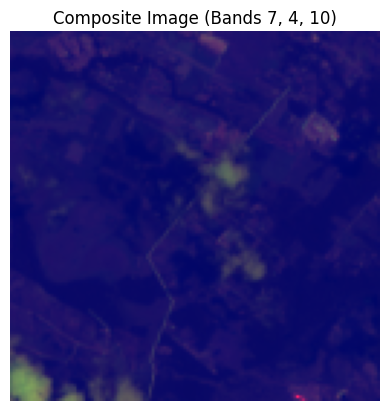

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
# Open the GeoTIFF file
file_path = "/content/drive/MyDrive/z227056_allbands_fire/LC08_L1TP_227056_20180907_20180907_01_RT_bands_f_s128_p06594.tif"

dataset = gdal.Open(file_path)
band_count = dataset.RasterCount

# Initialize arrays to store band data
band_data_list = []
# Collect Bands 2, 6, 7, 3, and 10 data
for band_idx in [7,4,10]:  # Adjust the band indices as needed
    band = dataset.GetRasterBand(band_idx)
    band_data = band.ReadAsArray()
    band_data_list.append(band_data)

# Stack the bands to create a composite
composite_image = np.stack(band_data_list, axis=-1)

# Normalize pixel values to [0, 1]
composite_image = (composite_image - np.min(composite_image)) / (np.max(composite_image) - np.min(composite_image))
# Display the composite image
plt.imshow(composite_image)
plt.title('Composite Image (Bands 7, 4, 10)')
plt.axis('off')
plt.show()



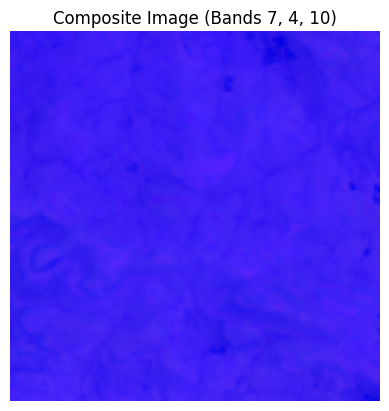

In [ ]:


from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
no_file_path = "/content/drive/MyDrive/z224082_allbands_nonfire/LC08_L1TP_224082_20180206_20180221_01_T1_bands_n_s128_p06108.tif"
no_dataset = gdal.Open(no_file_path)
no_band_count = no_dataset.RasterCount
# Initialize arrays to store band data
no_band_data_list = []
#we chose bands 7,4,10 as they gave the best results
for band_idx in [7,4,10]:
    no_band =  no_dataset.GetRasterBand(band_idx)
    no_band_data = no_band.ReadAsArray()
    no_band_data_list.append(no_band_data)

# Stack the bands to create a composite
no_composite_image = np.stack(no_band_data_list, axis=-1)

# Normalize pixel values to [0, 1]
no_composite_image = (no_composite_image - np.min(no_composite_image)) / (np.max(no_composite_image) - np.min(no_composite_image))
# Display the composite image
plt.imshow(no_composite_image)
plt.title('Composite Image (Bands 7, 4, 10)')
plt.axis('off')
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from osgeo import gdal

wildfire_dir = "/content/drive/MyDrive/z227056_allbands_fire"
non_wildfire_dir = "/content/drive/MyDrive/z224082_allbands_nonfire"
output_model_path = "/path/to/save/model/model.h5"
input_shape = (128, 128, 3)  # Input image shape
batch_size = 32
epochs = 10


In [ ]:
def load_and_preprocess_image(file_path):
    dataset = gdal.Open(file_path)
    band_data_list = []
    for band_idx in [7, 4, 10]:
        band = dataset.GetRasterBand(band_idx)
        band_data = band.ReadAsArray()
        band_data_list.append(band_data)
    composite_image = np.stack(band_data_list, axis=-1)
    composite_image = (composite_image - np.min(composite_image)) / (np.max(composite_image) - np.min(composite_image))
    return composite_image

fire_image_paths = [os.path.join(wildfire_dir, filename) for filename in os.listdir(wildfire_dir)]
non_image_paths = [os.path.join(non_wildfire_dir, filename) for filename in os.listdir(non_wildfire_dir)]

fire_images = [load_and_preprocess_image(path) for path in fire_image_paths]
non_images = [load_and_preprocess_image(path) for path in non_image_paths]
#save images
fire_images = np.array(fire_images)
non_images = np.array(non_images)

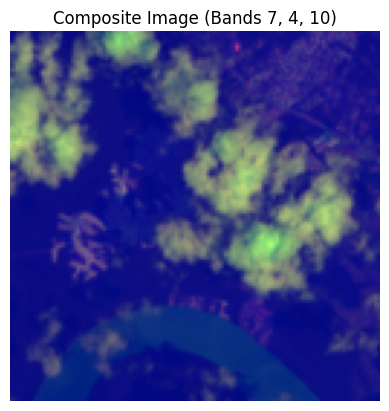

In [ ]:
plt.imshow(fire_images[53])
plt.title('Composite Image (Bands 7, 4, 10)')
plt.axis('off')
plt.show()

Number of red/orange pixels in the first image: 12
Area of fire: 360  metres


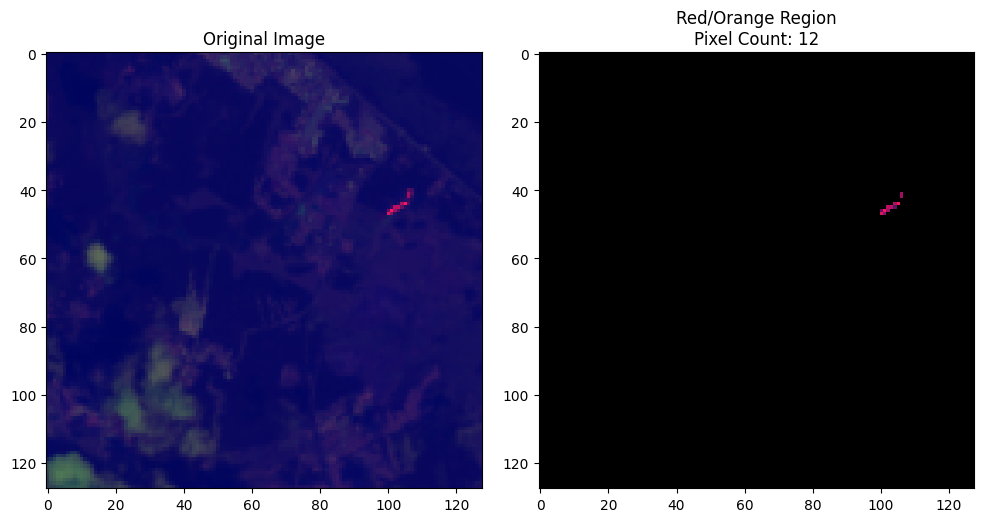

In [ ]:
import numpy as np


lower_red_range = np.array([0.36, 0, 0])  # lower val
upper_red_range = np.array([100, 0.3, 0.4])  # upper val

first_image = fire_images[1]#choose value passed here to check fire area of each image

red_channel = first_image[:, :, 0]

# Create a mask for red/orange pixels
red_orange_mask = np.all(np.logical_and(first_image >= lower_red_range, first_image <= upper_red_range), axis=-1)

# count pixels
num_red_orange_pixels = np.count_nonzero(red_orange_mask)

print("Number of red/orange pixels in the first image:", num_red_orange_pixels)
print("Area of fire:", num_red_orange_pixels*30," metres")

#mask
red_orange_region = np.zeros_like(first_image)
red_orange_region[red_orange_mask] = first_image[red_orange_mask]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(first_image)#display
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(red_orange_region)
plt.title(f"Red/Orange Region\nPixel Count: {num_red_orange_pixels}")

plt.tight_layout()
plt.show()


